In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)


In [2]:
#load data and show first rows
df = pd.read_csv('D600 Task 3 Dataset 1 Housing Information.csv')
print("Initial dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()


Initial dataset shape: (7000, 22)

First few rows:


,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.90,566.62,1.00,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54,0
1,5009,155586.09,1472.34,1.00,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.60,0
2,4450,131050.83,550.00,1.78,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34,0
3,1070,151361.71,941.81,2.04,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12,0
4,400,113167.61,550.00,1.06,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.60,0


In [3]:
# selecting the same variables from Task 1
selected_features = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 
                    'RenovationQuality', 'DistanceToCityCenter', 'AgeOfHome']
X = df[selected_features]
y = df['Price']

analysis_vars = ['Price'] + selected_features
print("\nDescriptive Statistics:")
df[analysis_vars].describe()




Descriptive Statistics:


,Price,SquareFootage,NumBathrooms,NumBedrooms,RenovationQuality,DistanceToCityCenter,AgeOfHome
count,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00
mean,307281.97,1048.95,2.13,3.01,5.00,17.48,46.80
std,150173.43,426.01,0.95,1.02,1.97,12.02,31.78
min,85000.00,550.00,1.00,1.00,0.01,0.00,0.01
25%,192107.53,660.82,1.29,2.00,3.66,7.83,20.76
50%,279322.95,996.32,2.00,3.00,5.02,15.62,42.62
75%,391878.13,1342.29,2.76,4.00,6.35,25.22,67.23
max,1046675.64,2874.70,5.81,7.00,10.00,65.20,178.68


In [4]:

# standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# save standardized dataset
standardized_data = pd.concat([X_scaled_df, y], axis=1)
standardized_data.to_csv('cleaned_dataset_task3.csv', index=False)


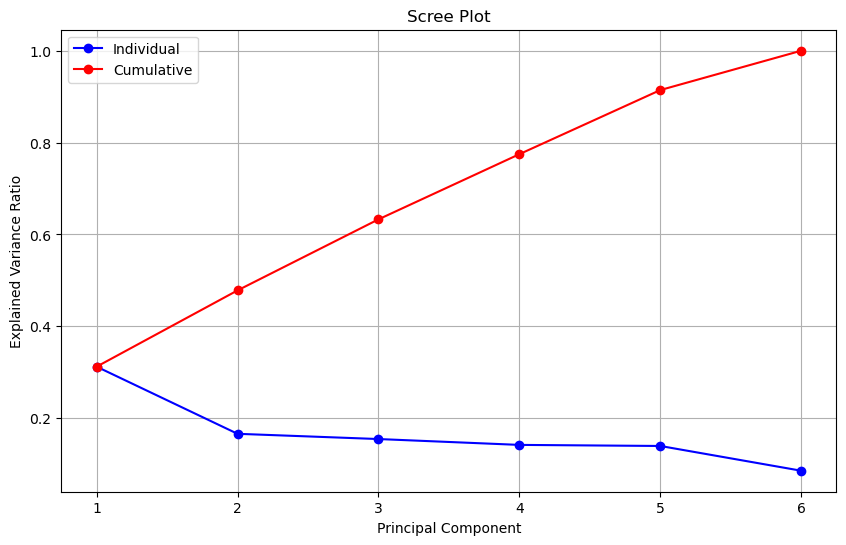

In [5]:

# pca
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

#calce explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', label='Individual')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()


Number of components to retain: 5

Eigenvalues:
PC1: 1.8733
PC2: 0.9965
PC3: 0.9280
PC4: 0.8515
PC5: 0.8374
PC6: 0.5141

Explained Variance Ratio by Component:
PC1: 0.3122 (31.22%)
PC2: 0.1661 (16.61%)
PC3: 0.1546 (15.46%)
PC4: 0.1419 (14.19%)
PC5: 0.1396 (13.96%)
PC6: 0.0857 (8.57%)

Cumulative Variance Explained:
PC1 to PC1: 0.3122 (31.22%)
PC1 to PC2: 0.4782 (47.82%)
PC1 to PC3: 0.6329 (63.29%)
PC1 to PC4: 0.7748 (77.48%)
PC1 to PC5: 0.9143 (91.43%)
PC1 to PC6: 1.0000 (100.00%)

Principal Components Matrix:
     SquareFootage  NumBathrooms  NumBedrooms  RenovationQuality  \
PC1         0.4498        0.4089       0.3479             0.5719   
PC2         0.2696        0.2626      -0.0880             0.2483   
PC3        -0.2892       -0.2839       0.8752             0.0840   
PC4        -0.4056        0.5970       0.0044             0.0681   
PC5         0.5155       -0.4716      -0.0490             0.1492   

     DistanceToCityCenter  AgeOfHome  
PC1               -0.3503    -0.2444

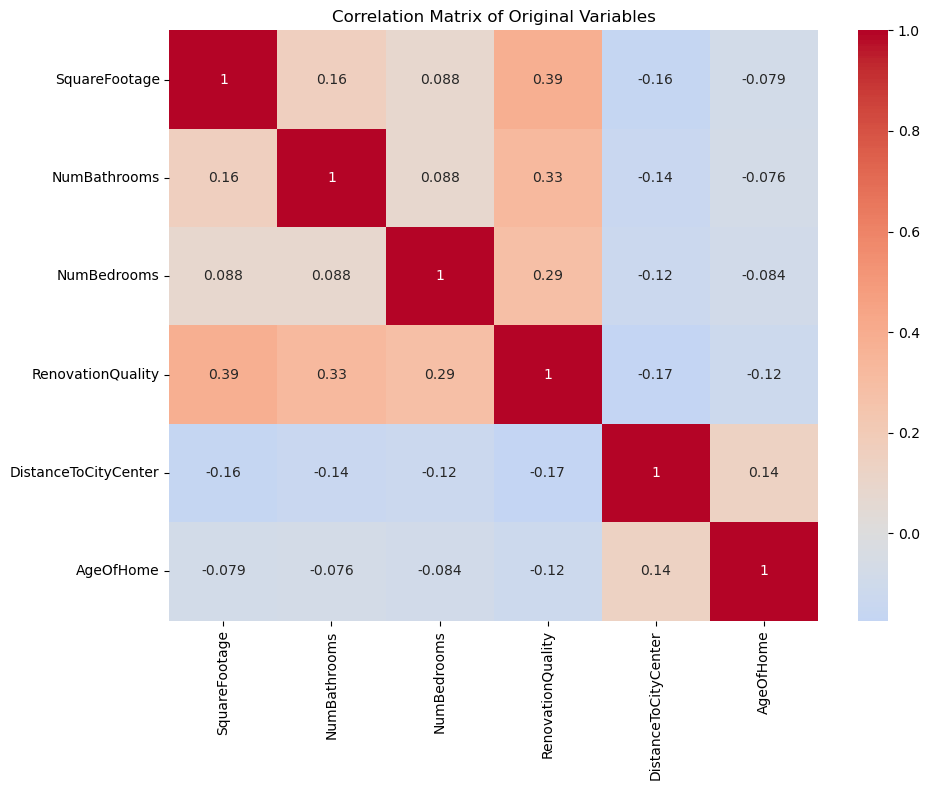

In [6]:


#  elbow rule - retaining 5 components 
n_components = 5  # based on the elbow in the scree plot
print(f"Number of components to retain: {n_components}")

# eigenvalues
print("\nEigenvalues:")
eigenvalues = pca.explained_variance_
for i, eigenvalue in enumerate(eigenvalues):
    print(f"PC{i+1}: {eigenvalue:.4f}")


# explained variance ratio by component
print("\nExplained Variance Ratio by Component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

#cumulative variance explained
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Variance Explained:")
for i, ratio in enumerate(cumulative_var_ratio):
    print(f"PC1 to PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")



# PCA components matrix
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
pca_components = pd.DataFrame(
    pca.components_[0:5],  
    columns=selected_features,
    index=[f'PC{i+1}' for i in range(5)]  # pirst 5 PCs
)

print("\nPrincipal Components Matrix:")
print(pca_components)

# create correlation matrix heatmap for original variables
plt.figure(figsize=(10, 8))
correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Original Variables')
plt.tight_layout()
plt.show()




In [7]:

# create final PCA dataset
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])


In [8]:

# split into training and test sets (80/20 split as in Task 1)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# save training and test datasets
train_data = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(n_components)])
train_data['Price'] = y_train
train_data.to_csv('training_dataset_task3.csv', index=False)

test_data = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(n_components)])
test_data['Price'] = y_test
test_data.to_csv('test_dataset_task3.csv', index=False)


In [9]:


# fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# calculate training metrics
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# calculate adjusted R-squared
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_train = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)

# calculate test metrics
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# print results
print("\nModel Results:")
print(f"R-squared (Training): {train_r2:.3f}")
print(f"Adjusted R-squared (Training): {adjusted_r2_train:.3f}")
print(f"MSE (Training): {train_mse:.2f}")
print(f"RMSE (Training): ${train_rmse:.2f}")
print(f"\nR-squared (Test): {test_r2:.3f}")
print(f"MSE (Test): {test_mse:.2f}")
print(f"RMSE (Test): ${test_rmse:.2f}")

# print component coefficients
coef_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(n_components)],
    'Coefficient': model.coef_
})
print("\nPrincipal Component Coefficients:")
print(coef_df)

#p-values for coefficients using statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)  # Add intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()

# extract and print p-values and the regression equation
print("\nP-Values for Components:")
print(model_sm.pvalues[1:])  # Skip the intercept

# regression equation
print("\nRegression Equation:")
equation = f"Price = {model.intercept_:.2f}"
for i, coef in enumerate(model.coef_):
    equation += f" + ({coef:.2f}) * PC{i+1}"
print(equation)

#model metrics summary
print("\nSummary of Metrics:")
print(f"Adjusted R² (Training): {adjusted_r2_train:.3f}")
print(f"R² (Test): {test_r2:.3f}")
print(f"MSE (Training): {train_mse:.2f}")
print(f"MSE (Test): {test_mse:.2f}")
print(f"RMSE (Training): ${train_rmse:.2f}")
print(f"RMSE (Test): ${test_rmse:.2f}")




Model Results:
R-squared (Training): 0.554
Adjusted R-squared (Training): 0.554
MSE (Training): 10211843843.31
RMSE (Training): $101053.67

R-squared (Test): 0.508
MSE (Test): 10422399640.28
RMSE (Test): $102090.15

Principal Component Coefficients:
  Component  Coefficient
0       PC1   78641.9088
1       PC2   23489.8917
2       PC3   16635.4401
3       PC4    4890.7685
4       PC5    7855.5420

P-Values for Components:
x1   0.0000
x2   0.0000
x3   0.0000
x4   0.0008
x5   0.0000
dtype: float64

Regression Equation:
Price = 308142.77 + (78641.91) * PC1 + (23489.89) * PC2 + (16635.44) * PC3 + (4890.77) * PC4 + (7855.54) * PC5

Summary of Metrics:
Adjusted R² (Training): 0.554
R² (Test): 0.508
MSE (Training): 10211843843.31
MSE (Test): 10422399640.28
RMSE (Training): $101053.67
RMSE (Test): $102090.15
